In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings("ignore")


Import Dataset

In [3]:
df = pd.read_csv("data.csv")
df.head(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1


EDA

In [4]:
df.shape

(381109, 12)

In [5]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [7]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [8]:
df['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

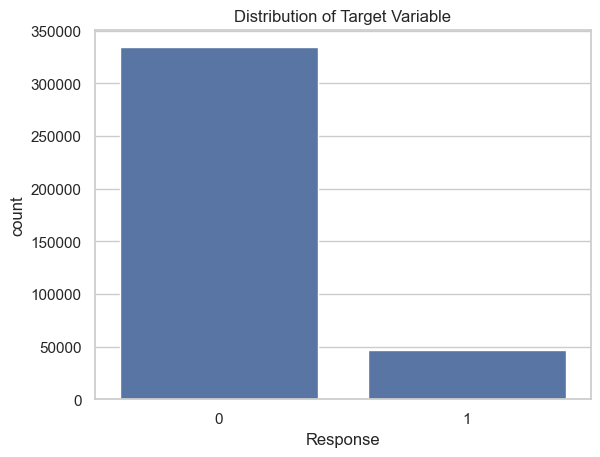

In [9]:
sns.countplot(x='Response', data=df)
plt.title("Distribution of Target Variable")
plt.show()

<Axes: xlabel='Vehicle_Age', ylabel='count'>

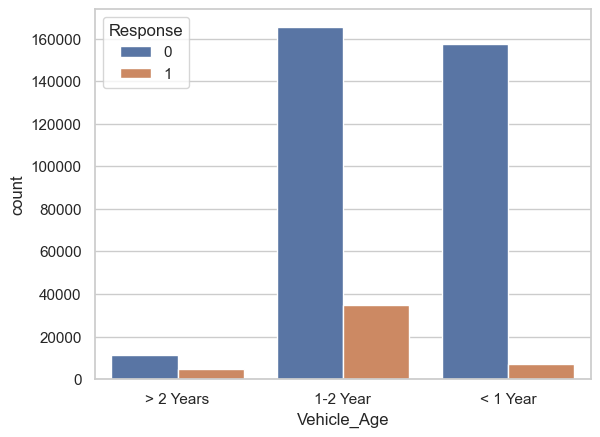

In [11]:
sns.countplot(x='Vehicle_Age', hue='Response', data=df)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '26.0'),
  Text(1, 0, '122.0'),
  Text(2, 0, '124.0'),
  Text(3, 0, '151.0'),
  Text(4, 0, '152.0'),
  Text(5, 0, '154.0'),
  Text(6, 0, '156.0'),
  Text(7, 0, '157.0'),
  Text(8, 0, '160.0'),
  Text(9, 0, '163.0')])

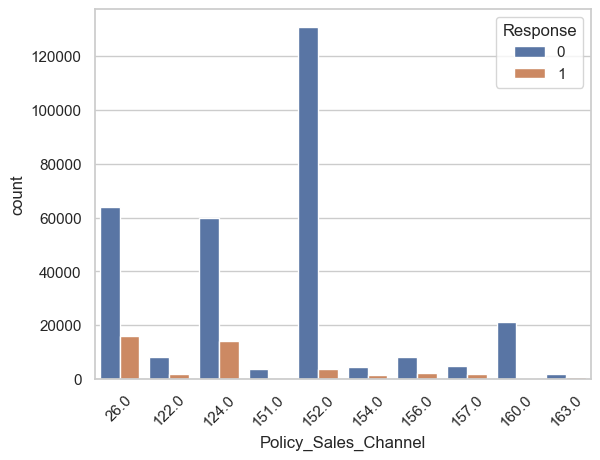

In [12]:
top_channels = df['Policy_Sales_Channel'].value_counts().nlargest(10).index
sns.countplot(x='Policy_Sales_Channel', hue='Response', data=df[df['Policy_Sales_Channel'].isin(top_channels)])
plt.xticks(rotation=45)

<Axes: xlabel='Annual_Premium', ylabel='Count'>

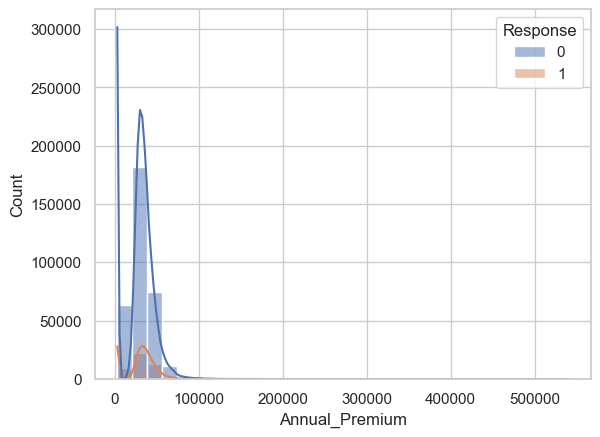

In [13]:
sns.histplot(data=df, x='Annual_Premium', hue='Response', bins=30, kde=True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '3.0'),
  Text(1, 0, '8.0'),
  Text(2, 0, '11.0'),
  Text(3, 0, '15.0'),
  Text(4, 0, '28.0'),
  Text(5, 0, '29.0'),
  Text(6, 0, '30.0'),
  Text(7, 0, '41.0'),
  Text(8, 0, '46.0'),
  Text(9, 0, '50.0')])

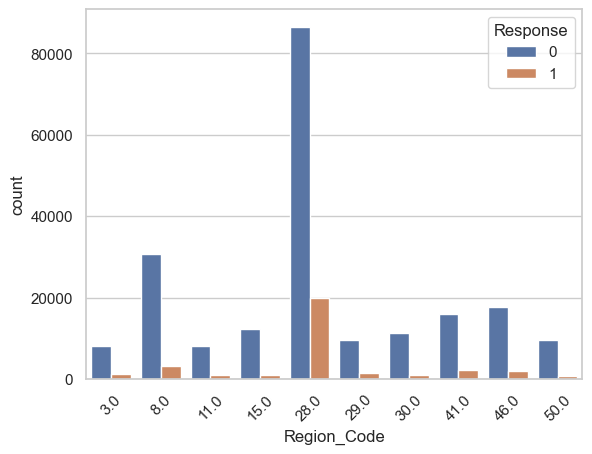

In [14]:
top_regions = df['Region_Code'].value_counts().nlargest(10).index
sns.countplot(x='Region_Code', hue='Response', data=df[df['Region_Code'].isin(top_regions)])
plt.xticks(rotation=45)

Data Preprocessing

In [15]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [21]:
num_fea = ['Age', 'Vintage']
cat_fea = ['Gender', 'Driving_License', 'Region_Code','Previously_Insured', 'Vehicle_Age_At_2_Year','Vehicle_Age_At_1_Year', 'Policy_Sales_Channel','Vehicle_Damage_Yes']

In [17]:
df['Gender'] = df['Gender'].map({'Female': 0 , 'Male': 1}).astype(int)
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [18]:
for col in df.columns:
    print(f"{col} >> {df[col].dtype}")

id >> int64
Gender >> int64
Age >> int64
Driving_License >> int64
Region_Code >> float64
Previously_Insured >> int64
Vehicle_Age >> object
Vehicle_Damage >> object
Annual_Premium >> float64
Policy_Sales_Channel >> float64
Vintage >> int64
Response >> int64


In [20]:
df = pd.get_dummies(df, drop_first=True)
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0,40454.0,26.0,217,1,False,True,True
1,2,1,76,1,3.0,0,33536.0,26.0,183,0,False,False,False


In [22]:
df = df.rename(columns = {"Vehicle_Age_< 1 Year": "Vehicle_Age_At_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_At_2_Year"})
df['Vehicle_Age_At_1_Year'] = df['Vehicle_Age_At_1_Year'].astype('int')
df['Vehicle_Age_At_2_Year'] = df['Vehicle_Age_At_2_Year'].astype('int')
df['Vehicle_Damage_Yes'] = df['Vehicle_Damage_Yes'].astype('int')

In [23]:
for columns in cat_fea:
    df[columns] = df[columns].astype('str')

In [25]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler

ss = StandardScaler()
df[num_fea] = ss.fit_transform(df[num_fea])

mm = MinMaxScaler()
df[['Annual_Premium']] = mm.fit_transform(df[['Annual_Premium']])

id = df.id
df = df.drop('id', axis=1)

In [27]:
from sklearn.model_selection import train_test_split

train_target = df['Response']
train = df.drop(['Response'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(train, train_target, random_state=42, test_size=0.3)

In [28]:
train_target

0         1
1         0
2         1
3         0
4         0
         ..
381104    0
381105    0
381106    0
381107    0
381108    0
Name: Response, Length: 381109, dtype: int64

In [29]:
train.head

<bound method NDFrame.head of        Gender       Age Driving_License Region_Code Previously_Insured  \
0           1  0.333777               1        28.0                  0   
1           1  2.396751               1         3.0                  0   
2           1  0.527181               1        28.0                  0   
3           1 -1.148985               1        11.0                  1   
4           0 -0.633242               1        41.0                  1   
...       ...       ...             ...         ...                ...   
381104      1  2.267815               1        26.0                  1   
381105      1 -0.568774               1        37.0                  1   
381106      1 -1.148985               1        30.0                  1   
381107      0  1.881007               1        14.0                  0   
381108      1  0.462713               1        29.0                  0   

        Annual_Premium Policy_Sales_Channel   Vintage Vehicle_Age_At_1_Year  \
0 

Modeling

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, 7, 10],
    'min_samples_leaf': [4, 6, 8],
    'min_samples_split': [5, 7, 10],
    'n_estimators': [300]
}


clf = RandomForestClassifier(random_state=42)


random_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_dist,
    n_iter=10,
    cv=4,
    verbose=1,
    random_state=101,
    n_jobs=-1
)


random_search.fit(X_train, y_train)


print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_depth': 10, 'criterion': 'gini'}
Best Score: 0.8779275497046211
